In [220]:
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

prevseason = '2018-2019'
thisseason = '2019-2020'

url1 = 'https://www.nbastuffer.com/{}-nba-team-stats/'.format(prevseason)
sess = requests.session()
page1 = sess.get(url1)
soup1 = BeautifulSoup(page1.content, "lxml")
soup1.prettify()
all_table1 = soup1.find_all('table')
season_table1 = all_table1[1]
df_prev = pd.read_html(str(season_table1))[0]




url2 = 'https://www.nbastuffer.com/{}-nba-team-stats/'.format(thisseason)
page2 = sess.get(url2)
soup2 = BeautifulSoup(page2.content, "lxml")
soup2.prettify()
all_table2 = soup2.find_all('table')
season_table2 = all_table2[0]
df_current = pd.read_html(str(season_table2))[0]


In [221]:
df_prev.head()

,RANK,TEAM,CONF,DIVISION,GP,PTS/GMPoints Per GameAverage points per game,aPTS/GMPoints Allowed Per GameAverage points allowed per game,PTS DIFFPoints Differential{(Total Points Scored) - (Total Points Allowed)}/ (Games Played),PACEPaceEstimate of Possessions Per 48 Minutes,OEFFOffensive EfficiencyPoints scored per 100 possessions.,...,SARSchedule Adjusted RatingAn evaluation of teams based on efficiency differential and strength of schedule,"CONSConsistency RatingConsistency based on game-by-game efficiency differential variation. The higher the team has a consistency rating, the more unpredictable it is.",A4FAdjusted Four FactorsCalculated by applying weights to the differentials of offensive and defensive four factors. A4F explains the specified proportion of variability in wins.,"WWinsThe most important goal in sports, unless your team is not tanking",LLossesTotal count of games lost,WIN%,eWIN%Correlated Gaussian Expected Winning PercentageIndicates the ideal winning percentage based on offensive and defensive performance.,pWIN%Projected Winning PercentageEach point differential translates to 2.7 wins over the course of the season.,ACHAchievement Level In Terms of Wins. The metric is based on differential between actual and expected winning percentage. Positive figures indicate overachievement while negative figures indicate the team should have won more games.,STRKCurrent StreakWinning or losing streak for the season.
0,NaN,Atlanta,East,Southeast,82,113.3,119.4,-6.1,103.9,108.2,...,-5.06,12.5,-0.005,29,53,0.354,0.325,0.299,0.029,L 3
1,NaN,Boston,East,Atlantic,82,112.4,108.0,4.4,99.6,112.3,...,4.00,14.6,0.003,49,33,0.598,0.621,0.645,-0.023,W 1
2,NaN,Brooklyn,East,Atlantic,82,112.2,112.3,-0.1,100.8,109.6,...,-0.04,12.7,0.029,42,40,0.512,0.497,0.497,0.015,W 3
3,NaN,Charlotte,East,Southeast,82,110.7,111.8,-1.1,98.6,111.4,...,-1.61,16.2,-0.054,39,43,0.476,0.473,0.464,0.003,L 1
4,NaN,Chicago,East,Central,82,104.9,113.4,-8.5,99.0,104.8,...,-7.52,14.4,-0.051,22,60,0.268,0.280,0.220,-0.012,L 3


In [222]:
df_current.head()

,RANK,TEAM,CONF,DIVISION,GP,PTS/GMPoints Per GameAverage points per game,aPTS/GMPoints Allowed Per GameAverage points allowed per game,PTS DIFFPoints Differential{(Total Points Scored) - (Total Points Allowed)}/ (Games Played),PACEPaceEstimate of Possessions Per 48 Minutes,OEFFOffensive EfficiencyPoints scored per 100 possessions.,...,SARSchedule Adjusted RatingAn evaluation of teams based on efficiency differential and strength of schedule,"CONSConsistency RatingConsistency based on game-by-game efficiency differential variation. The higher the team has a consistency rating, the more unpredictable it is.",A4FAdjusted Four FactorsCalculated by applying weights to the differentials of offensive and defensive four factors. A4F explains the specified proportion of variability in wins.,"WWinsThe most important goal in sports, unless your team is not tanking",LLossesTotal count of games lost,WIN%,eWIN%Correlated Gaussian Expected Winning PercentageIndicates the ideal winning percentage based on offensive and defensive performance.,pWIN%Projected Winning PercentageEach point differential translates to 2.7 wins over the course of the season.,ACHAchievement Level In Terms of Wins. The metric is based on differential between actual and expected winning percentage. Positive figures indicate overachievement while negative figures indicate the team should have won more games.,STRKCurrent StreakWinning or losing streak for the season.
0,NaN,Atlanta,East,Southeast,13,106.1,115.5,-9.4,102.1,103.1,...,-5.06,15.6,-0.033,4,9,0.308,0.280,0.190,0.028,L 3
1,NaN,Boston,East,Atlantic,13,112.6,104.2,8.4,100.9,111.6,...,6.42,9.7,0.003,11,2,0.846,0.806,0.777,0.040,W 1
2,NaN,Brooklyn,East,Atlantic,13,114.5,118.5,-4.0,105.2,107.1,...,-4.52,11.5,0.048,5,8,0.385,0.371,0.368,0.014,L 1
3,NaN,Charlotte,East,Southeast,14,105.9,113.6,-7.7,99.9,105.2,...,-6.47,13.0,-0.073,6,8,0.429,0.276,0.246,0.153,L 1
4,NaN,Chicago,East,Central,14,107.2,111.3,-4.1,103.7,103.4,...,-3.05,12.7,-0.097,4,10,0.286,0.379,0.365,-0.093,L 3


In [17]:
# noise (beta0) for each team can maybe be the difference of their 1/5 wins this year
# to their 1/5 wins last year

# maybe train 2017 test 2018 use model on 2019?

In [223]:
df_prev_cln = df_prev[['TEAM', 'OEFFOffensive EfficiencyPoints scored per 100 possessions.',
                       'DEFFDefensive EfficiencyPoints allowed per 100 possessions.',
                       'WWinsThe most important goal in sports, unless your team is not tanking']]
df_prev_cln.rename(columns={'OEFFOffensive EfficiencyPoints scored per 100 possessions.': 'OEFF',
                            'DEFFDefensive EfficiencyPoints allowed per 100 possessions.': 'DEFF',
                            'WWinsThe most important goal in sports, unless your team is not tanking':'W'}, inplace=True)

df_cur_cln = df_current[['TEAM', 'OEFFOffensive EfficiencyPoints scored per 100 possessions.',
                       'DEFFDefensive EfficiencyPoints allowed per 100 possessions.',
                       'WWinsThe most important goal in sports, unless your team is not tanking']]
df_cur_cln.rename(columns={'OEFFOffensive EfficiencyPoints scored per 100 possessions.': 'OEFF',
                            'DEFFDefensive EfficiencyPoints allowed per 100 possessions.': 'DEFF',
                            'WWinsThe most important goal in sports, unless your team is not tanking':'W'}, inplace=True)


C:\Users\Olive Schumm\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [224]:
def abbrev_city(df):
    mapp = {'Atlanta': 'ATL',
           'Boston': 'BOS',
            'Brooklyn': 'BKN',
           'Charlotte': 'CHA',
           'Chicago': 'CHI',
           'Cleveland': 'CLE',
           'Dallas': 'DAL',
           'Denver': 'DEN',
           'Detroit': 'DET',
           'Golden State': 'GSW',
           'Houston': 'HOU',
           'Indiana': 'IND',
           'LA Clippers': 'LAC',
           'LA Lakers': 'LAL',
           'Memphis': 'MEM',
           'Miami': 'MIA',
           'Milwaukee': 'MIL',
           'Minnesota': 'MIN',
           'New Orleans': 'NOP',
           'New York': 'NYK',
           'Oklahoma City': 'OKC',
           'Orlando': 'ORL',
           'Philadelphia': 'PHI',
           'Phoenix': 'PHX',
           'Portland': 'POR',
           'Sacramento': 'SAC',
           'San Antonio': 'SAS',
           'Toronto': 'TOR',
           'Utah': 'UTA',
           'Washington': 'WAS'}
    
    df['TEAM'] = df.TEAM.map(mapp)
    return df

abbrev_city(df_prev_cln)
abbrev_city(df_cur_cln)

C:\Users\Olive Schumm\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TEAM,OEFF,DEFF,W
0,ATL,103.1,112.2,4
1,BOS,111.6,103.2,11
2,BKN,107.1,110.9,5
3,CHA,105.2,112.9,6
4,CHI,103.4,107.3,4
5,CLE,104.8,109.2,4
6,DAL,113.5,110.2,8
7,DEN,107.2,103.2,9
8,DET,108.9,112.5,4
9,GSW,106.5,114.5,3


In [225]:
print('definition of OEFF: points scored per 100 possesion')
print('definition of DEFF: points allowed per 100 possesion')

definition of OEFF: points scored per 100 possesion
definition of DEFF: points allowed per 100 possesion


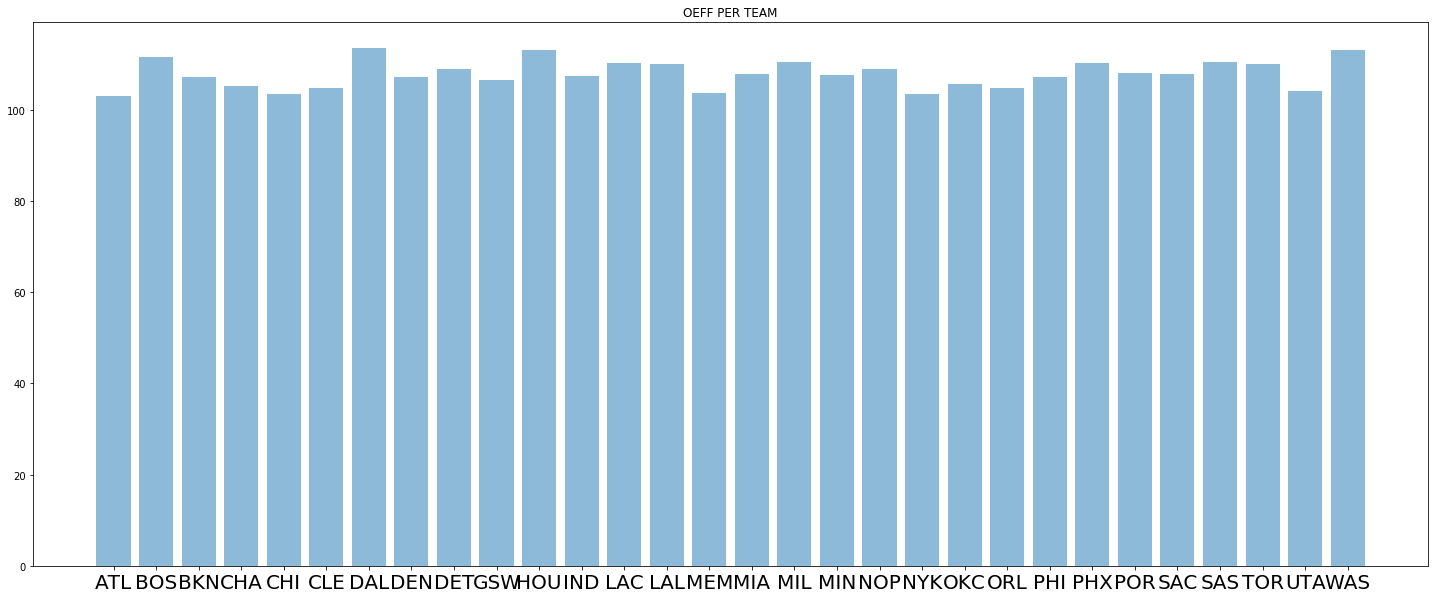

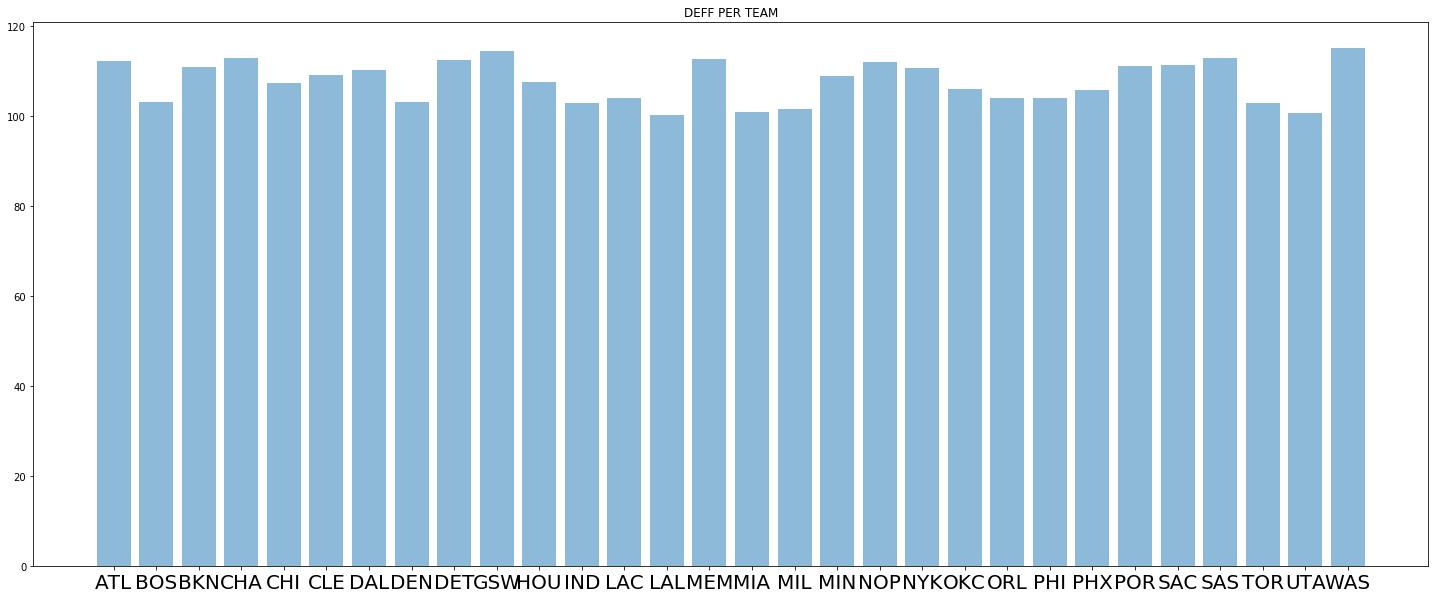

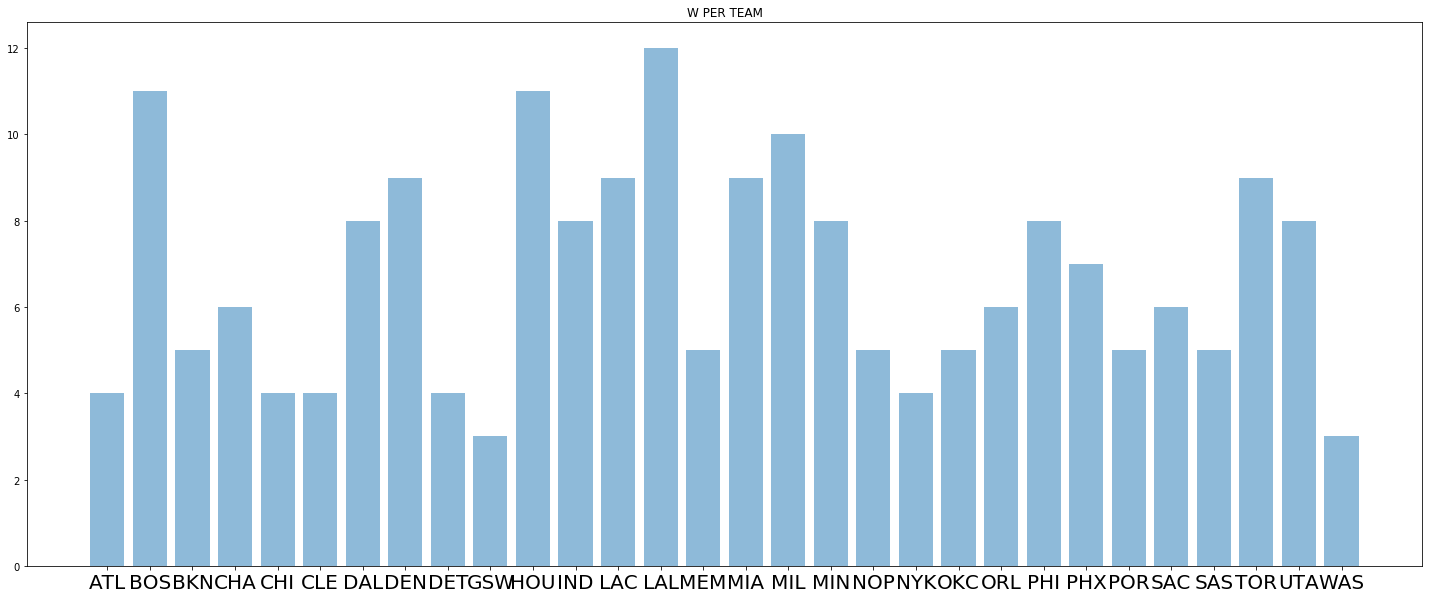

In [226]:
def plot(df):
    
    
    objects = df_cur_cln.TEAM
    
    for col in df.columns:
        if col != 'TEAM':
            performance = df_cur_cln[col]
            #objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
            y_pos = np.arange(len(objects))
            #performance = [10,8,6,4,2,1]

            plt.figure(figsize=(25,10))
            plt.bar(y_pos, performance, align='center', alpha=0.5)
            plt.xticks(y_pos, objects)
            plt.title('{} PER TEAM'.format(col))
        else:
            None

plot(df_prev_cln)


    

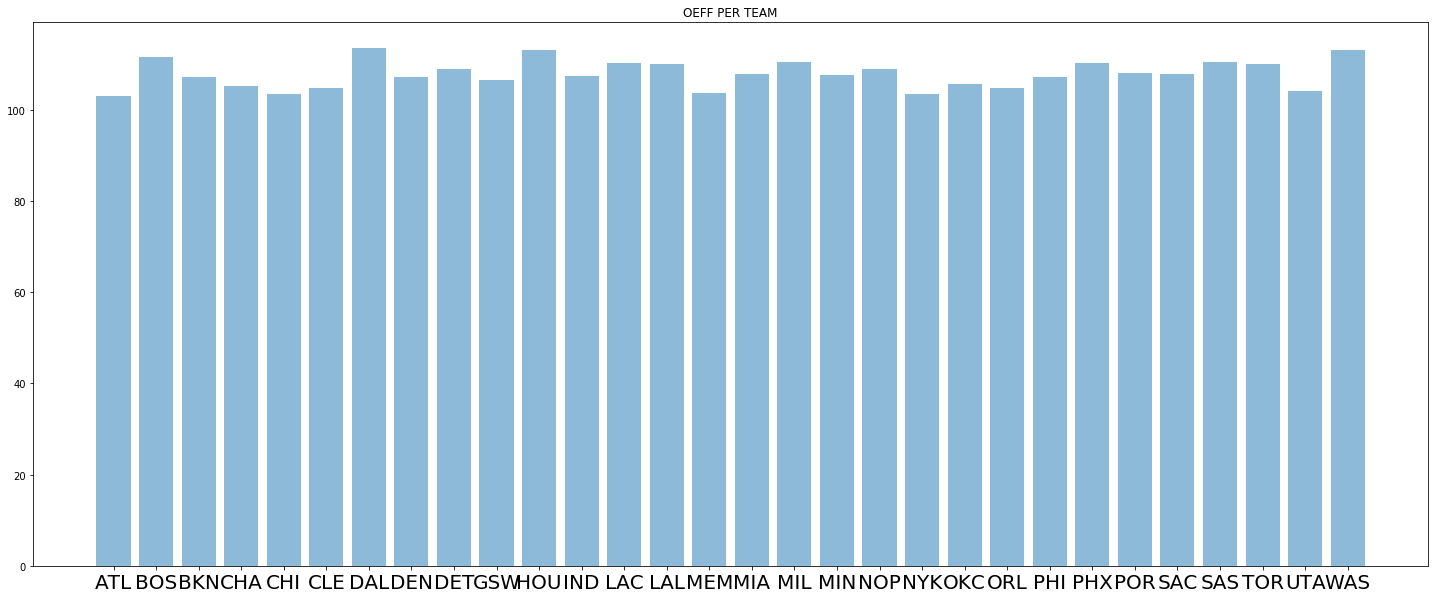

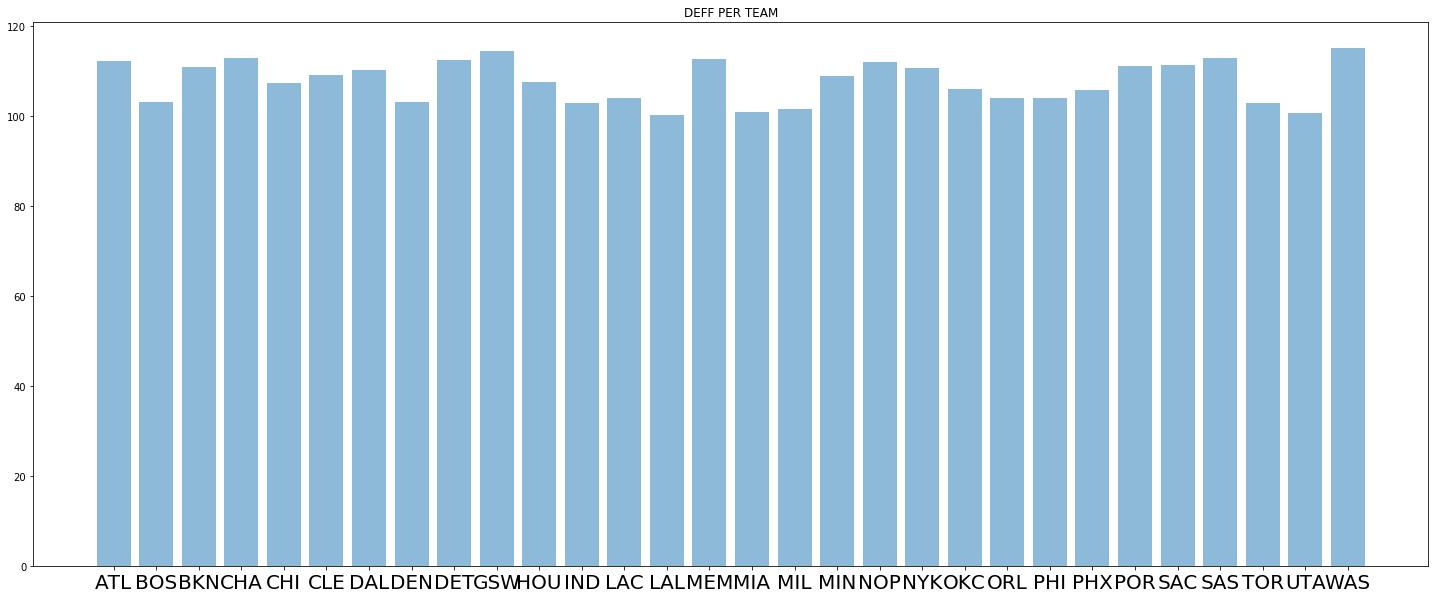

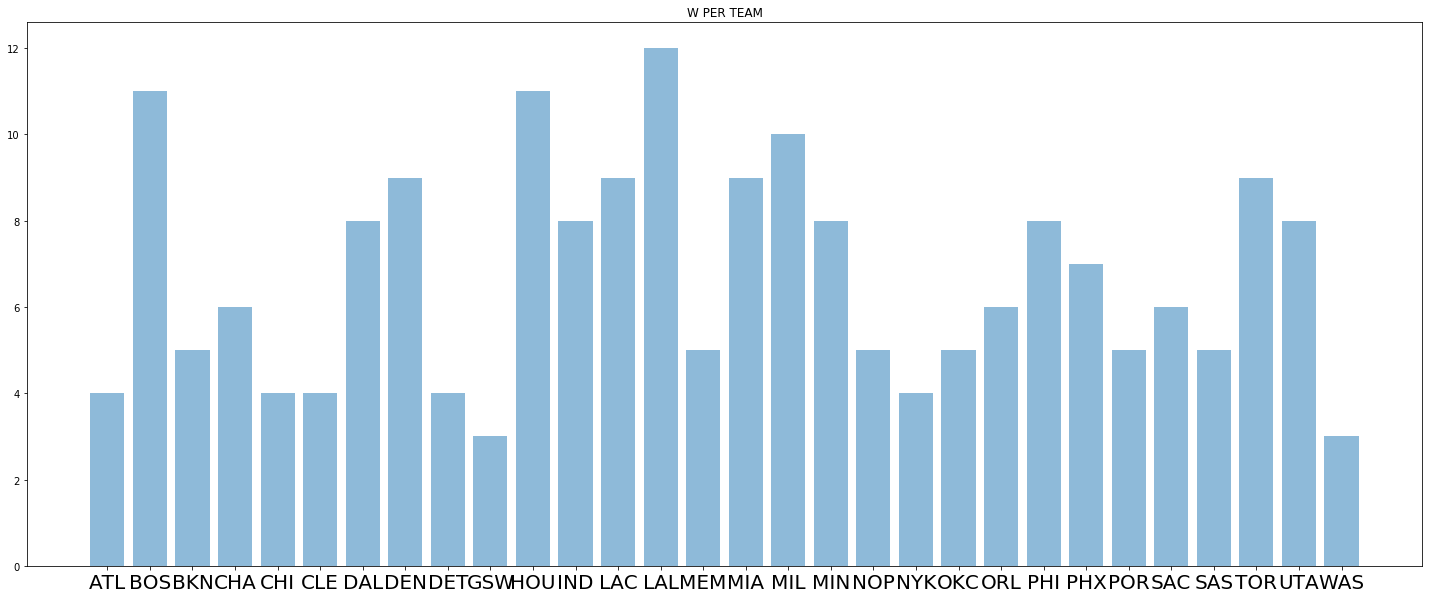

In [227]:
plot(df_cur_cln)

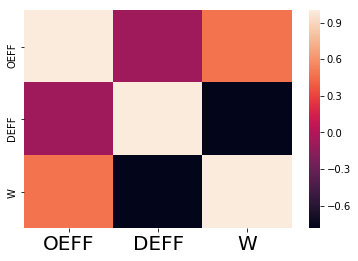

In [229]:
data = df_cur_cln.corr()

ax = sns.heatmap(data)

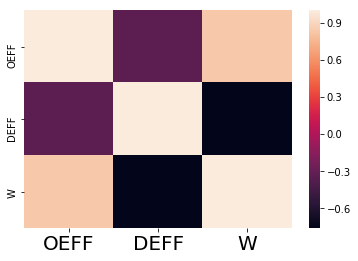

In [230]:
data = df_prev_cln.corr()

ax = sns.heatmap(data)

In [231]:
def BOTH_reg(dfp, dfc):
    
    dfpT = dfp[['OEFF', 'DEFF', 'W']]
    dfcT = dfc[['OEFF', 'DEFF', 'W']]
    
    train_x = dfpT#[['OEFF', 'DEFF']]
    train_y = train_x['W']
    test_x = dfcT#[['OEFF', 'DEFF']]
    test_y = test_x['W']
    train_x.drop('W', axis=1, inplace=True)
    test_x.drop('W', axis=1, inplace=True)

    reg = LinearRegression().fit(train_x, train_y)

    y_pred = reg.predict(test_x)

    dfc['Predicted W based Both'] = y_pred
    
    return dfc

def OEFF_reg(dfp,dfc):
    
    dfpT = dfp[['OEFF', 'DEFF', 'W']]
    dfcT = dfc[['OEFF', 'DEFF', 'W']]
    
    train_x = dfpT[['OEFF', 'W']]
    train_y = train_x['W']
    test_x = dfcT[['OEFF', 'W']]
    test_y = test_x['W']
    train_x.drop('W', axis=1, inplace=True)
    test_x.drop('W', axis=1, inplace=True)

    reg = LinearRegression().fit(train_x, train_y)

    y_pred = reg.predict(test_x)
    
    dfc['Predic W based of OEFF'] = y_pred
    return dfc
 
def DEFF_reg(dfp,dfc):
    
    dfpT = dfp[['OEFF', 'DEFF', 'W']]
    dfcT = dfc[['OEFF', 'DEFF', 'W']]
    
    train_x = dfpT[['DEFF', 'W']]
    train_y = train_x['W']
    test_x = dfcT[['DEFF', 'W']]
    test_y = test_x['W']
    train_x.drop('W', axis=1, inplace=True)
    test_x.drop('W', axis=1, inplace=True)

    reg = LinearRegression().fit(train_x, train_y)

    y_pred = reg.predict(test_x)
    
    dfc['Predic W based of DEFF'] = y_pred
    return dfc


In [232]:
BOTH_reg(df_prev_cln, df_cur_cln)

C:\Users\Olive Schumm\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Olive Schumm\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TEAM,OEFF,DEFF,W,Predicted W based Both
0,ATL,103.1,112.2,4,17.711155
1,BOS,111.6,103.2,11,60.019308
2,BKN,107.1,110.9,5,31.163066
3,CHA,105.2,112.9,6,21.731833
4,CHI,103.4,107.3,4,29.285812
5,CLE,104.8,109.2,4,28.812852
6,DAL,113.5,110.2,8,49.650048
7,DEN,107.2,103.2,9,48.368285
8,DET,108.9,112.5,4,32.409306
9,GSW,106.5,114.5,3,21.654093


In [233]:
OEFF_reg(df_prev_cln, df_cur_cln)

C:\Users\Olive Schumm\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Olive Schumm\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TEAM,OEFF,DEFF,W,Predicted W based Both,Predic W based of OEFF
0,ATL,103.1,112.2,4,17.711155,16.447084
1,BOS,111.6,103.2,11,60.019308,44.983974
2,BKN,107.1,110.9,5,31.163066,29.876209
3,CHA,105.2,112.9,6,21.731833,23.497374
4,CHI,103.4,107.3,4,29.285812,17.454268
5,CLE,104.8,109.2,4,28.812852,22.154462
6,DAL,113.5,110.2,8,49.650048,51.362808
7,DEN,107.2,103.2,9,48.368285,30.211937
8,DET,108.9,112.5,4,32.409306,35.919315
9,GSW,106.5,114.5,3,21.654093,27.861840


In [234]:
DEFF_reg(df_prev_cln, df_cur_cln)

C:\Users\Olive Schumm\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Olive Schumm\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,TEAM,OEFF,DEFF,W,Predicted W based Both,Predic W based of OEFF,Predic W based of DEFF
0,ATL,103.1,112.2,4,17.711155,16.447084,35.466614
1,BOS,111.6,103.2,11,60.019308,44.983974,63.392113
2,BKN,107.1,110.9,5,31.163066,29.876209,39.500297
3,CHA,105.2,112.9,6,21.731833,23.497374,33.294631
4,CHI,103.4,107.3,4,29.285812,17.454268,50.670497
5,CLE,104.8,109.2,4,28.812852,22.154462,44.775114
6,DAL,113.5,110.2,8,49.650048,51.362808,41.672281
7,DEN,107.2,103.2,9,48.368285,30.211937,63.392113
8,DET,108.9,112.5,4,32.409306,35.919315,34.535764
9,GSW,106.5,114.5,3,21.654093,27.861840,28.330098
